<a href="https://colab.research.google.com/github/bbqgonewrong/weather_prediction/blob/main/Weather_Forecasting_MultiVariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [5]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse



##Grabbing the data set from Tensorflow

In [2]:
#Importing dataset
zip_path = tf.keras.utils.get_file(origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
                                   fname = 'jena_climate_2009_2016.csv.zip',
                                   extract = True)
csv_path,_ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)

In [30]:
temp = df['T (degC)']

##Creating the dataset from raw data

In [14]:
#Look at the last 4 values in order to set them as the target variable
# x = [[[1],[2]],[3],[4],[5]]] y= [6]
# [[[2],[3],[4],[5],[6]]] y = [7]

def df_to_X_y(df,window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)

In [25]:
#Call the function to store the previous 5 temperatures for the row defined.
df.index = pd.to_datetime(df['Date Time'],format = '%d.%m.%Y %H:%M:%S') #Converting the index to date time
window_size = 5
X,y = df_to_X_y(temp,window_size)
X.shape,y.shape

((420546, 5, 1), (420546,))

In [26]:
X_train,y_train = X[:357464], y[:357464]
X_val,y_val = X[357464:378490], y[357464:378490]
X_test,y_test = X[378490:], y[378490:]

In [27]:
X_val.shape,y_val.shape

((21026, 5, 1), (21026,))

##Creating declaration in order to plot the predicted and the actual values created by models

In [6]:
def plot_predictions(model,X,y,start = 0,end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data = {'Predictions': predictions,'Actuals': y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df,mse(y,predictions)

#Defining the models used and performing univariate time-series analysis

*   1D CNN
*   GRU



## 1 Dimensional CNN being used 
* Advantages: less complexity in implementation


###Creating a 1d CNN model

In [8]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64,kernel_size = 2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


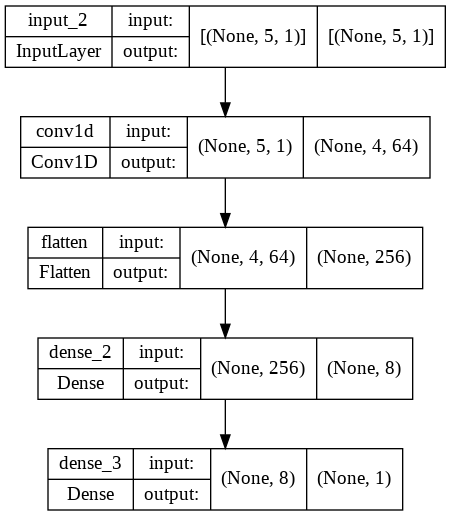

In [10]:
#Plotting the model for viewing
tf.keras.utils.plot_model(
    model2,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

###Compiling the model and the optimizers and defining callbacks

In [18]:
cp2 = ModelCheckpoint('model2/',save_best_only=True)
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 1e-4),metrics = [RootMeanSquaredError()])


###Training the 1d CNN model

In [ ]:
model2.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 10,callbacks=[cp2])

In [ ]:
model2 = load_model('model2/')

## Using a Gated Recurrent Unit (GRU)

###Defining the GRU model

In [20]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


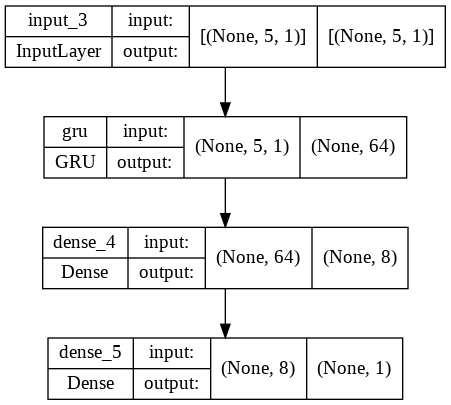

In [22]:
#Plotting the model for viewing
tf.keras.utils.plot_model(
    model3,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

###Compiling the model and the optimizers and defining callbacks

In [23]:
cp3 = ModelCheckpoint('model3/',save_best_only=True)
model3.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 1e-4),metrics = [RootMeanSquaredError()])


###Training the 1d CNN model

In [24]:
model3.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 10,callbacks=[cp3])

Epoch 1/10
11170/11171 [============================>.] - ETA: 0s - loss: 17.3094 - root_mean_squared_error: 4.1605

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 54s 5ms/step - loss: 17.3082 - root_mean_squared_error: 4.1603 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1740
Epoch 2/10
11161/11171 [============================>.] - ETA: 0s - loss: 0.0486 - root_mean_squared_error: 0.2204

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 0.0486 - root_mean_squared_error: 0.2204 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1668
Epoch 3/10
11171/11171 [==============================] - 53s 5ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 4/10
11171/11171 [==============================] - ETA: 0s - loss: 0.0450 - root_mean_squared_error: 0.2122

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 0.0450 - root_mean_squared_error: 0.2122 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 5/10
11163/11171 [============================>.] - ETA: 0s - loss: 0.0447 - root_mean_squared_error: 0.2113

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 0.0447 - root_mean_squared_error: 0.2113 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1641
Epoch 6/10
11171/11171 [==============================] - 50s 4ms/step - loss: 0.0444 - root_mean_squared_error: 0.2108 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650
Epoch 7/10
11163/11171 [============================>.] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.2107

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 53s 5ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1637
Epoch 8/10
11171/11171 [==============================] - 49s 4ms/step - loss: 0.0442 - root_mean_squared_error: 0.2103 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 9/10
11162/11171 [============================>.] - ETA: 0s - loss: 0.0441 - root_mean_squared_error: 0.2100

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


11171/11171 [==============================] - 53s 5ms/step - loss: 0.0441 - root_mean_squared_error: 0.2099 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 10/10
11171/11171 [==============================] - 49s 4ms/step - loss: 0.0440 - root_mean_squared_error: 0.2097 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650


In [ ]:
model3 = load_model('model3/')

#Now transforming to multivariate time series analysis using the defined models

## Defining the seconds parameter for recording the temperature. Taking Temperature first as a data series and using it in order to view insights

In [37]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

In [44]:
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 00:10:00,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,0.216440,0.976296,0.009930,0.999951


## Using day and year parameters from the index in order to create day sin, day cos as well as year sin and year cos. 
Converting the seconds to periodic using sin and cos.
day sin = sin(2*pi*seconds/total_number_seconds_day)

In [40]:
#Number of seconds in a day and in a year
day = 60*60*24
year = 365.2425*day
#Day sin and day cos
temp_df['Day sin'] = np.sin(temp_df['Seconds']*(2*np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*(2*np.pi/day))
#Year sin and year cos
temp_df['Year sin'] = np.sin(temp_df['Seconds']*(2*np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*(2*np.pi/year))


In [43]:
temp_df = temp_df.drop('Seconds',axis = 1)

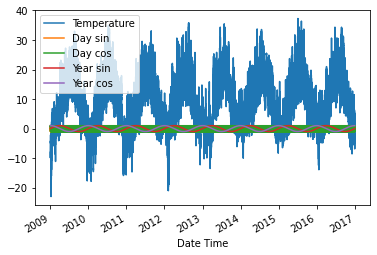

In [45]:
temp_df.plot()

##Modifying the data frame creation function in order to incorporate multiple values using the sin cos functions as compared to a single one previously.

In [52]:
#Look at the last 4 values in order to set them as the target variable
#New methodology
# x = [[[t1,ds1,dc1,ys1,yc1],[t2,ds2,dc2,ys2,yc2]],[t3,ds3,dc3,ys3,yc3],[t4,ds4,dc4,ys4,yc4],[t5,ds5,dc5,ys5,yc5]]] y= [t6]

def df_to_X_y_multi(df,window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)

In [53]:
X2,y2 = df_to_X_y_multi(temp_df)
X2.shape,y.shape

((420546, 5, 5), (420546,))

##Splitting data into test and train

In [54]:
X2_train,y2_train = X2[:357464], y2[:357464]
X2_val,y2_val = X2[357464:378490], y2[357464:378490]
X2_test,y2_test = X2[378490:], y2[378490:]

##Standardising the temperature

In [55]:
temp_train_mean = np.mean(X2_train[:,:,0])
temp_train_sd = np.std(X2_train[:,:,0])

def preprocess(X):
  X[:,:,0] = (X[:,:,0]-temp_train_mean)/temp_train_sd
  return X



In [ ]:
preprocess(X2_train)
preprocess(X2_test)
preprocess(X2_val)

##Defining and training the models for multivariate analysis

###1. Using LSTM

####Defining the model

In [57]:
model4 = Sequential()
model4.add(InputLayer((5,5)))
model4.add(LSTM(64))
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


####Checkpointing and training the data


In [58]:
#Defining the checkpoints
cp4 = ModelCheckpoint('model4/',save_best_only=True)
model4.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 1e-4),metrics = [RootMeanSquaredError()])

#Training the data
model4.fit(X2_train,y2_train,validation_data = (X2_val,y2_val),epochs = 10,callbacks=[cp4])

Epoch 1/10
11166/11171 [============================>.] - ETA: 0s - loss: 6.5646 - root_mean_squared_error: 2.5622

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 53s 5ms/step - loss: 6.5619 - root_mean_squared_error: 2.5616 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3209
Epoch 2/10
11170/11171 [============================>.] - ETA: 0s - loss: 0.0957 - root_mean_squared_error: 0.3093

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 0.0957 - root_mean_squared_error: 0.3093 - val_loss: 0.0481 - val_root_mean_squared_error: 0.2194
Epoch 3/10
11169/11171 [============================>.] - ETA: 0s - loss: 0.0625 - root_mean_squared_error: 0.2501

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 52s 5ms/step - loss: 0.0625 - root_mean_squared_error: 0.2501 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 4/10
11167/11171 [============================>.] - ETA: 0s - loss: 0.0505 - root_mean_squared_error: 0.2246

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 55s 5ms/step - loss: 0.0505 - root_mean_squared_error: 0.2246 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1740
Epoch 5/10
11171/11171 [==============================] - ETA: 0s - loss: 0.0461 - root_mean_squared_error: 0.2146

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 54s 5ms/step - loss: 0.0461 - root_mean_squared_error: 0.2146 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1675
Epoch 6/10
11171/11171 [==============================] - 50s 4ms/step - loss: 0.0444 - root_mean_squared_error: 0.2108 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 7/10
11171/11171 [==============================] - 53s 5ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1706
Epoch 8/10
11170/11171 [============================>.] - ETA: 0s - loss: 0.0430 - root_mean_squared_error: 0.2074

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 68s 6ms/step - loss: 0.0430 - root_mean_squared_error: 0.2074 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 9/10
11171/11171 [==============================] - 63s 6ms/step - loss: 0.0428 - root_mean_squared_error: 0.2068 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1798
Epoch 10/10
11170/11171 [============================>.] - ETA: 0s - loss: 0.0424 - root_mean_squared_error: 0.2060

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


11171/11171 [==============================] - 67s 6ms/step - loss: 0.0424 - root_mean_squared_error: 0.2060 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629


####Plotting the predictions

(       Predictions  Actuals
 0         2.721329     2.80
 1         2.742496     2.80
 2         2.738600     2.75
 3         2.662279     2.73
 4         2.666114     2.67
 ...            ...      ...
 42051    -4.073081    -4.05
 42052    -4.105648    -3.35
 42053    -3.100757    -3.16
 42054    -3.207119    -4.23
 42055    -4.689691    -4.82
 
 [42056 rows x 2 columns], 0.045388657531379474)

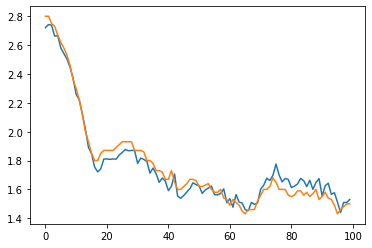

In [59]:
plot_predictions(model4,X2_test,y2_test)

####Predicting the pressure as output along with the temperature

In [62]:
p_temp_df = pd.concat([df['p (mbar)'],temp_df],axis = 1)

In [64]:
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,996.52,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,996.57,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,996.53,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,996.51,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,996.51,-8.27,0.216440,0.976296,0.009930,0.999951


####Modifying the function in order to incorporate pressure as well along with the temperature in a sliding window fashion.

In [65]:
#Look at the last 4 values in order to set them as the target variable
#New methodology
# x = [[[t1,p1,ds1,dc1,ys1,yc1],[t2,ds2,dc2,ys2,yc2]],[t3,ds3,dc3,ys3,yc3],[t4,ds4,dc4,ys4,yc4],[t5,ds5,dc5,ys5,yc5]]] y= [t6]

def df_to_X_y_multi_p(df,window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X),np.array(y)

####Data processing and pre processing the pressure data along with the temperature data

In [66]:
X3,y3 = df_to_X_y_multi_p(p_temp_df)

In [68]:
X3.shape,y3.shape

((420546, 5, 6), (420546, 2))

In [69]:
X3_train,y3_train = X3[:357464], y3[:357464]
X3_val,y3_val = X3[357464:378490], y3[357464:378490]
X3_test,y3_test = X3[378490:], y3[378490:]

####Defining the function in order to preprocess the input and the output using standardization

In [77]:
p_training_mean3 = np.mean(X3_train[:,:,0])
p_training_sd3 = np.std(X3_train[:,:,0])

temp_training_mean3 = np.mean(X3_train[:,:,1])
temp_training_sd3 = np.std(X3_train[:,:,1])

def preprocess3(X):
  X[:,:,0] = (X[:,:,0]-p_training_mean3)/p_training_sd3
  X[:,:,1] = (X[:,:,1]-temp_training_mean3)/temp_training_sd3 

def preprocess_out(y):
  y[:,0] = (y[:,0]-p_training_mean3)/p_training_sd3
  y[:,1] = (y[:,1]-temp_training_mean3)/temp_training_sd3 
  return y

In [72]:
preprocess3(X3_train)
preprocess3(X3_test)
preprocess3(X3_val)

In [74]:
y3_train.shape

(357464, 2)

In [84]:
preprocess_out(y3_train)
preprocess_out(y3_test)
preprocess_out(y3_val)

array([[ 992.41,    6.53],
       [ 992.44,    6.57],
       [ 992.44,    6.55],
       ...,
       [1002.07,    2.84],
       [1002.14,    2.86],
       [1002.19,    2.81]])

####Defining the model and incorporating pressure as well

In [79]:
model5 = Sequential()
model5.add(InputLayer((5,6)))
model5.add(LSTM(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(2,'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


####Checkpointing and training the temperature-pressure model


In [80]:
#Defining the checkpoints
cp5 = ModelCheckpoint('model5/',save_best_only=True)
model5.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 1e-4),metrics = [RootMeanSquaredError()])

#Training the data
model5.fit(X3_train,y3_train,validation_data = (X3_val,y3_val),epochs = 10,callbacks=[cp5])

Epoch 1/10
11161/11171 [============================>.] - ETA: 0s - loss: 327897.4062 - root_mean_squared_error: 572.6233

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 52s 4ms/step - loss: 327736.5312 - root_mean_squared_error: 572.4828 - val_loss: 144054.2031 - val_root_mean_squared_error: 379.5447
Epoch 2/10
11163/11171 [============================>.] - ETA: 0s - loss: 37148.7500 - root_mean_squared_error: 192.7401

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 37123.0234 - root_mean_squared_error: 192.6734 - val_loss: 80.6273 - val_root_mean_squared_error: 8.9793
Epoch 3/10
11159/11171 [============================>.] - ETA: 0s - loss: 75.7561 - root_mean_squared_error: 8.7038

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 49s 4ms/step - loss: 75.7513 - root_mean_squared_error: 8.7035 - val_loss: 77.7406 - val_root_mean_squared_error: 8.8171
Epoch 4/10
11171/11171 [==============================] - 46s 4ms/step - loss: 87.5070 - root_mean_squared_error: 9.3545 - val_loss: 79.8530 - val_root_mean_squared_error: 8.9361
Epoch 5/10
11171/11171 [==============================] - 46s 4ms/step - loss: 83.7422 - root_mean_squared_error: 9.1511 - val_loss: 78.2785 - val_root_mean_squared_error: 8.8475
Epoch 6/10
11162/11171 [============================>.] - ETA: 0s - loss: 64.9806 - root_mean_squared_error: 8.0611

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 49s 4ms/step - loss: 64.9587 - root_mean_squared_error: 8.0597 - val_loss: 26.3115 - val_root_mean_squared_error: 5.1295
Epoch 7/10
11170/11171 [============================>.] - ETA: 0s - loss: 41.4800 - root_mean_squared_error: 6.4405

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 50s 4ms/step - loss: 41.4793 - root_mean_squared_error: 6.4404 - val_loss: 23.3672 - val_root_mean_squared_error: 4.8340
Epoch 8/10
11169/11171 [============================>.] - ETA: 0s - loss: 40.3252 - root_mean_squared_error: 6.3502

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 49s 4ms/step - loss: 40.3255 - root_mean_squared_error: 6.3502 - val_loss: 21.6147 - val_root_mean_squared_error: 4.6492
Epoch 9/10
11160/11171 [============================>.] - ETA: 0s - loss: 39.4075 - root_mean_squared_error: 6.2775

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 51s 5ms/step - loss: 39.3984 - root_mean_squared_error: 6.2768 - val_loss: 21.1545 - val_root_mean_squared_error: 4.5994
Epoch 10/10
11159/11171 [============================>.] - ETA: 0s - loss: 35.2224 - root_mean_squared_error: 5.9348

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


11171/11171 [==============================] - 50s 5ms/step - loss: 35.2025 - root_mean_squared_error: 5.9332 - val_loss: 10.1442 - val_root_mean_squared_error: 3.1850


####Modifying the plotting function in order to incorporate both temp and pressure

In [86]:
def plot_predictions_tp(model,X,y,start = 0,end=150):
  predictions = model.predict(X)
  p_preds,temp_preds = post_process_p(predictions[:,0]),post_process_t(predictions[:,1])
  p_actuals,temp_actuals = y[:,0],y[:,1]
  df = pd.DataFrame(data = {'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals':p_actuals})
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,6.159262,2.80,1002.655518,1002.27
1,6.157694,2.80,1002.701843,1002.34
2,6.155985,2.75,1002.743896,1002.38
3,6.151533,2.73,1002.761108,1002.48
4,6.149889,2.67,1002.809021,1002.51
...,...,...,...,...
145,6.283289,0.87,1005.025208,1005.34
146,6.280775,0.87,1005.033020,1005.36
147,6.277601,0.86,1005.031555,1005.37
148,6.273333,0.87,1005.015076,1005.39


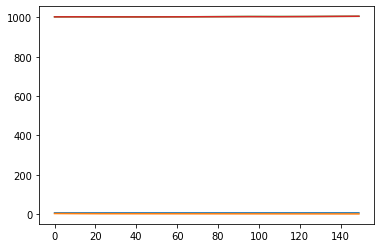

In [87]:
plot_predictions_tp(model5,X3_test,y3_test)

####Creating Post-processing function in order to bring the temperature and the pressure values back to scale

In [85]:
def post_process_p(arr):
  arr = (arr*p_training_sd3) + p_training_mean3
  return arr

def post_process_t(arr):
  arr = (arr*temp_training_sd3) + temp_training_mean3
  return arr